<a href="https://colab.research.google.com/github/AarthiVelpula/Garage-Management-System/blob/main/Fraud_Transactions_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import RFE

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Fraud.csv')

# Display the first few rows
print(data.head())

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0    

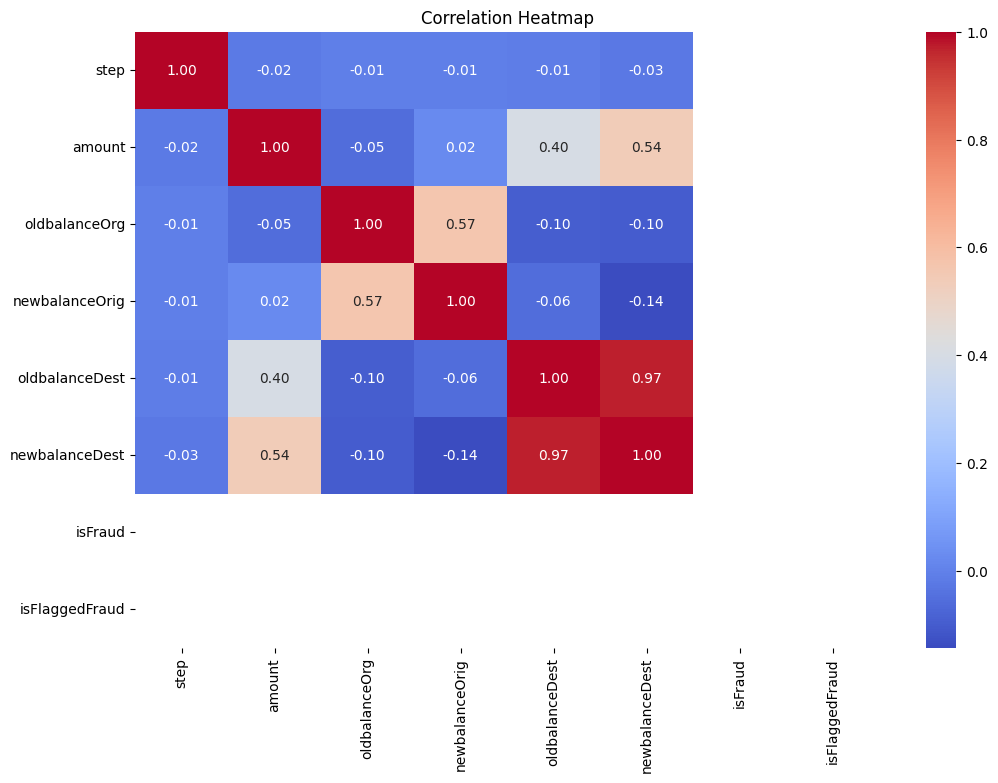

In [ ]:
# Handle missing values: Drop rows with missing values
data = data.dropna()

# Alternatively, fill missing values with median
# data.fillna(data.median(), inplace=True)

# Outlier Removal using IQR Method
# Select only numeric columns for outlier removal
numeric_data = data.select_dtypes(include=np.number)

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows containing outliers in numeric columns
# Apply the filter to the original DataFrame 'data'
data = data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]


# Check for multi-collinearity using correlation heatmap
# Select only numeric features for correlation analysis
numeric_features = data.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
corr = numeric_features.corr() # Calculate correlation on numeric features only
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Define features (X) and target variable (y)
# Drop the 'type' column, which is causing the error, and any other non-numeric columns
X = data.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data['isFraud']

# Feature Selection using Recursive Feature Elimination (RFE)
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
fit = rfe.fit(X, y)

# Display selected features and their rankings
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_})
print("Feature Ranking:\n", feature_ranking.sort_values('Ranking'))

Feature Ranking:
           Feature  Ranking
2   oldbalanceOrg        1
3  newbalanceOrig        1
4  oldbalanceDest        1
5  newbalanceDest        1
6  isFlaggedFraud        1
1          amount        2
0            step        3


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
print("Classification Report:\n", classification_report(y_test, y_pred))

# Check the number of unique classes in y_test
num_classes = len(np.unique(y_test))

# Modify ROC AUC calculation based on the number of classes
if num_classes > 1:
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
else:
    print("ROC AUC Score is not applicable for single class classification.")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    863882

    accuracy                           1.00    863882
   macro avg       1.00      1.00      1.00    863882
weighted avg       1.00      1.00      1.00    863882

ROC AUC Score is not applicable for single class classification.


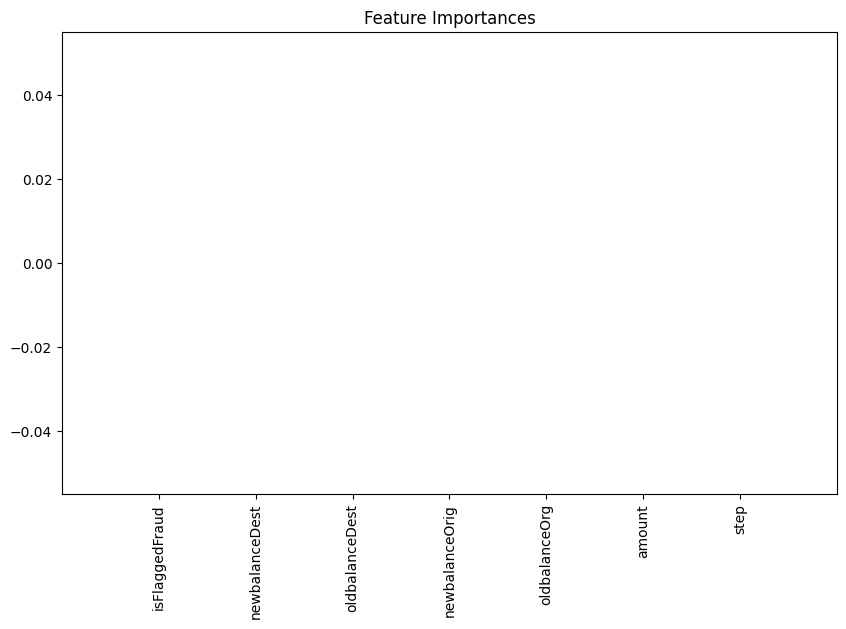

In [11]:
# Extract feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [15]:
print("""
Actionable Plan for Fraud Prevention
Based on the model's findings, the following actions are recommended:

1. Real-Time Monitoring: Implement real-time transaction monitoring using the identified key features.
2. Threshold Alerts: Set appropriate thresholds for flagging high-risk transactions.
3. Feedback Mechanism: Track flagged transactions to gather feedback and improve the model over time.
4. Infrastructure Update: Introduce advanced fraud detection tools and ensure regular audits of the system.
5. Periodic Model Update: Train the model regularly on new data to adapt to evolving fraud patterns.
""")



## Actionable Plan for Fraud Prevention
Based on the model's findings, the following actions are recommended:

1. **Real-Time Monitoring**: Implement real-time transaction monitoring using the identified key features.
2. **Threshold Alerts**: Set appropriate thresholds for flagging high-risk transactions.
3. **Feedback Mechanism**: Track flagged transactions to gather feedback and improve the model over time.
4. **Infrastructure Update**: Introduce advanced fraud detection tools and ensure regular audits of the system.
5. **Periodic Model Update**: Train the model regularly on new data to adapt to evolving fraud patterns.

